# Lorenzo Cassano
## 0 Importing Libraries

In [46]:
import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import  GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay

## 1 Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
url = '/content/drive/MyDrive/ML/Data/exam2022_01_13.csv'
df = pd.read_csv(url, sep = ',')

### Showing some information

In [15]:
df.shape

(329, 13)

In [16]:
df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


### Hinstogram of numeric columns

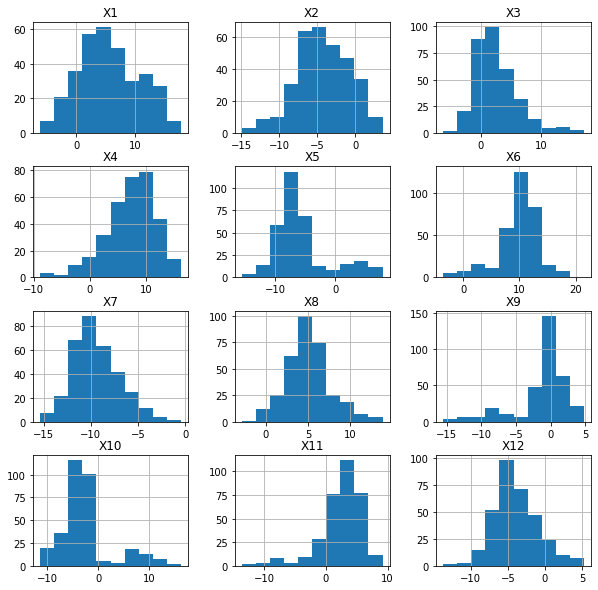

In [17]:
pd.DataFrame.hist(df.drop("language", axis = 1)
                  , figsize = [10,10]
                 );

### Hinstogram of class label language

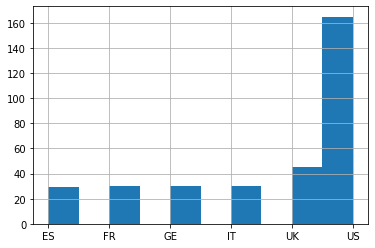

In [18]:
df["language"].hist()
                 

## 2 Drop Nan

In [20]:
df1 = df.dropna()
df1.shape

(321, 13)

In [ ]:
tune the hyper–parameters of Model1 with Cross Validation on the
training set, optimize for recall_macro

## 3 Tune the hyper–parameters of Model1 with Cross Validation on the training set, optimize for recall_macro

In [31]:
def print_results(model):
    print("Best parameters set found on train set:")
    print()
    # if best is linear there is no gamma parameter
    print(model.best_params_)
    print()
    print("Detailed classification report for the best parameter set:")
    print()
    print("The model is trained on the full train set.")
    print("The scores are computed on the full test set.")
    print()
    y_true, y_pred = ytest, model.predict(Xtest)
    print(classification_report(y_true, y_pred))
    print("Confusion matrix:\n")

    title = "Confusion matrix"

    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        Xtest,
        y_true,
        cmap = plt.cm.Blues,
    )
    
    disp.ax_.set_title(title)

    plt.show()
    print()
    print()

## Separating trainin and test set

In [27]:
target = "language"
X = df1.drop(target, axis = 1)
y = df1[target]

In [28]:
ts = 0.3
random_state = 42
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size = ts, random_state = random_state)

### Model 1

In [29]:
model = DecisionTreeClassifier()
model.fit(Xtrain,ytrain)
max_depth = model.max_depth

In [39]:
model_param = {'criterion':['gini', 'entropy'], 'max_depth':list(range(1,10)), 'min_samples_split': range(2,10)}
score = "recall_macro"
model1 = GridSearchCV(estimator = model,param_grid = model_param, scoring = score)
model1.fit(Xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': range(2, 10)},
             scoring='recall_macro')

Best parameters set found on train set:

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 4}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

          ES       0.57      0.80      0.67        10
          FR       0.55      0.67      0.60         9
          GE       0.56      0.50      0.53        10
          IT       0.50      0.27      0.35        11
          UK       0.67      0.40      0.50        10
          US       0.75      0.81      0.78        47

    accuracy                           0.66        97
   macro avg       0.60      0.57      0.57        97
weighted avg       0.65      0.66      0.65        97

Confusion matrix:



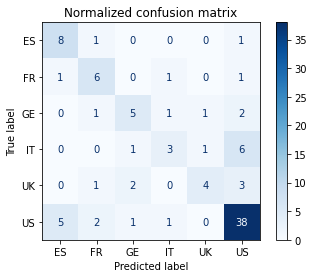

In [43]:
print_results(model1)

## Model 2

Best parameters set found on train set:

{'learning_rate': 0.75, 'n_estimators': 50}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

          ES       0.78      0.70      0.74        10
          FR       0.15      0.22      0.18         9
          GE       0.67      0.60      0.63        10
          IT       0.00      0.00      0.00        11
          UK       0.25      0.10      0.14        10
          US       0.54      0.66      0.60        47

    accuracy                           0.48        97
   macro avg       0.40      0.38      0.38        97
weighted avg       0.45      0.48      0.46        97

Confusion matrix:



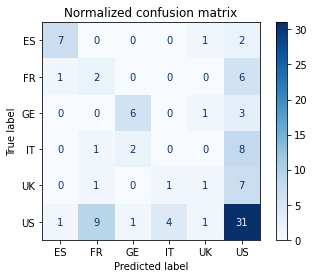

In [47]:
model_param = list(ParameterGrid({
    'n_estimators':[[20],[30],[40],[50]],
    'learning_rate':[[0.5],[0.75],[1],[1.25],[1.5]]}
))



model_est = AdaBoostClassifier(random_state=random_state)

model2 = GridSearchCV(model_est, model_param, scoring=score)

model2.fit(Xtrain, ytrain)

print_results(model2)